,,f1,f1c,h,nmi,Clicks
0,supervised swap 1,0.771438,NaN,NaN,NaN,717.0
1,supervised swap volunteer 1,0.256580,NaN,NaN,NaN,909.0


Total clicks:  4948
supervised swap 1


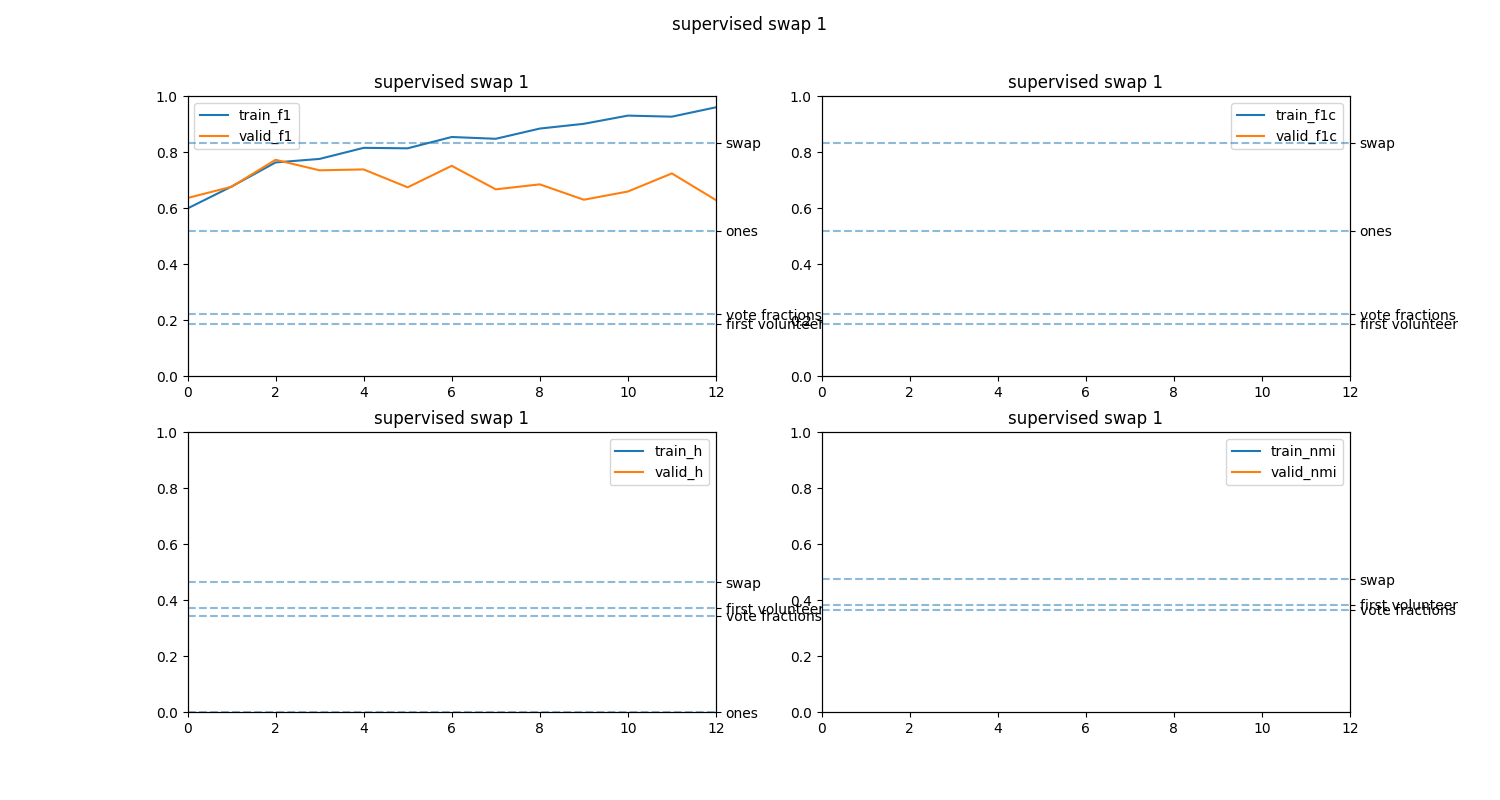

supervised swap volunteer 1


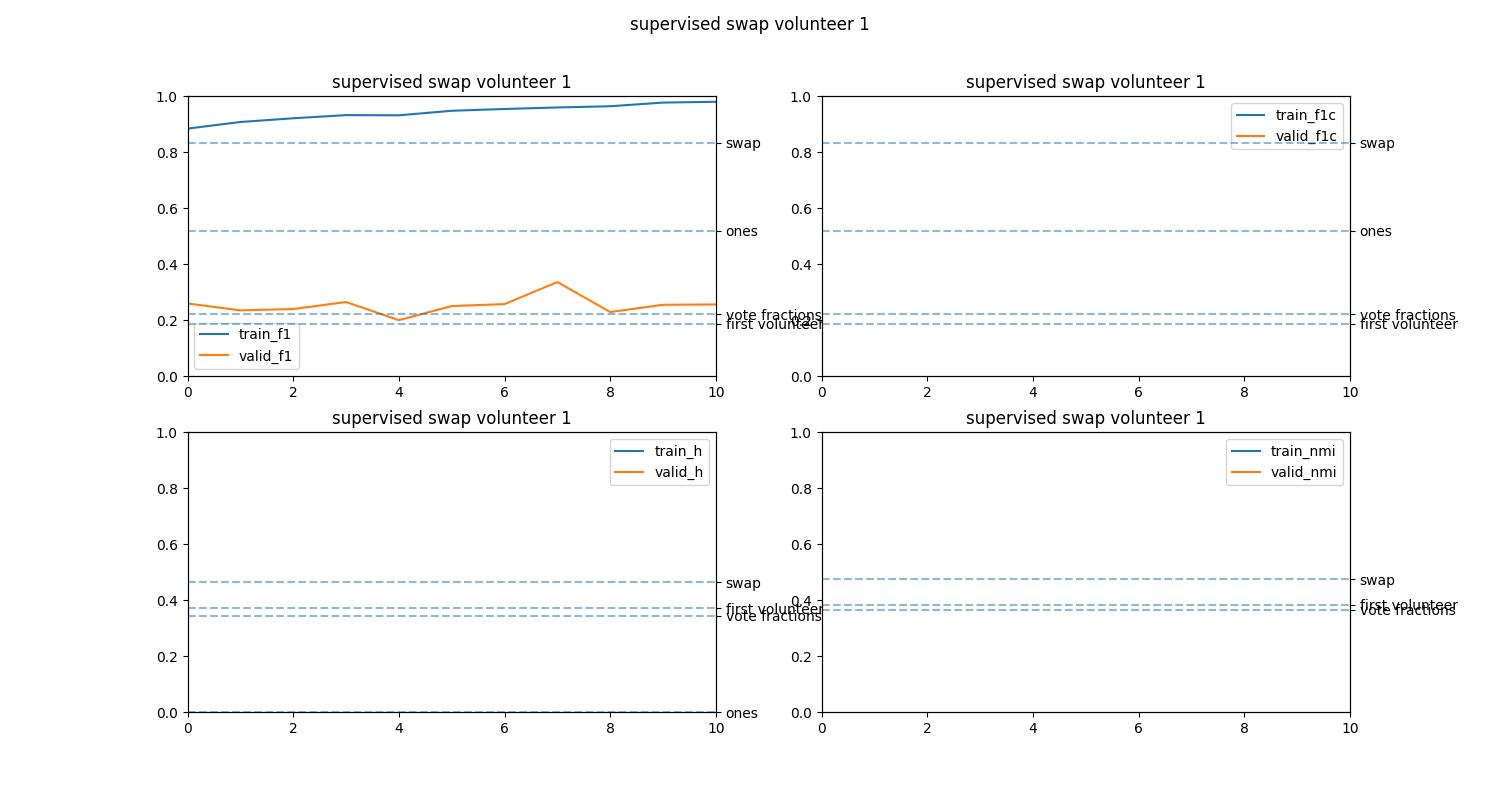

[['supervised swap 1', 0.7714376793114439, nan, nan, nan, 717.0],
 ['supervised swap volunteer 1', 0.2565801582919197, nan, nan, nan, 909.0]]

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import pickle
import numpy as np
import pandas
from keras import backend as K
import os
from IPython.display import Image
import csv

os.chdir(os.path.join(os.getenv('MUON'), 'notebook'))

from sklearn.decomposition import PCA
import matplotlib.colors
from matplotlib.colors import LinearSegmentedColormap

from muon.dissolving.utils import get_cluster_centres
# from muon.dissolving.utils import pca_plot
# from muon.dissolving.redec import ReDEC
# from muon.dissolving.multitask import MultitaskDEC
# from muon.deep_clustering.clustering import Config
from muon.deep_clustering.clustering import discrete_cmap

import logging
logger = logging.getLogger()
logger.setLevel(logging.WARN)
# logger.ha

from muon.dissolving.decv2 import DECv2, Config

with open('mnt/subjects/split_v2_swap_norotation_xy.pkl', 'rb') as f:
    splits = pickle.load(f)
    total_test_subjects = splits['test'][0].shape[0]

with open(os.path.join(os.getenv('MUON'), 'muon/scripts/models/decv2/supervised_models.csv')) as f:
    reader = csv.reader(f)
    next(reader)
    runs = [i[0].strip() for i in reader if int(i[2])]
    
def report_runs(runs):
    metrics = []
    for save_dir in runs:
    #     display(Image(save_dir+'/pca_plot.png'))
        with open(save_dir+'/report.pkl', 'rb') as f:
            item = pickle.load(f)
        metrics.append([item['name'], *item['metrics'], item['clicks'][0]])
    display(pandas.DataFrame(metrics, columns=['', 'f1', 'f1c', 'h', 'nmi', 'Clicks']))
    print('Total clicks: ', total_test_subjects)


    for save_dir in runs:
        with open(save_dir+'/report.pkl', 'rb') as f:
            item = pickle.load(f)
            print(item['name'])
            
        fname = save_dir+'/pca_plot.png'
        if os.path.isfile(fname):
            display(Image(fname))
        if os.path.isfile(save_dir+'/metrics.pkl'):
            display(Image(save_dir+'/train_metrics.png'))

        if 'supervised' not in save_dir:
            cmap = list(zip(*item['cmap']))
            cmap = pandas.DataFrame(cmap, columns=['majority class', 'n_assigned', 'purity'])
            display(cmap.loc[cmap['n_assigned']>0])

    return metrics

report_runs(runs)
    
